# Setup

## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
diabetes = pd.read_csv("/content/drive/MyDrive/Advik Vatsyayan/diabetes.csv")

In [ ]:
diabetes.info()
diabetes.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


#Visualization

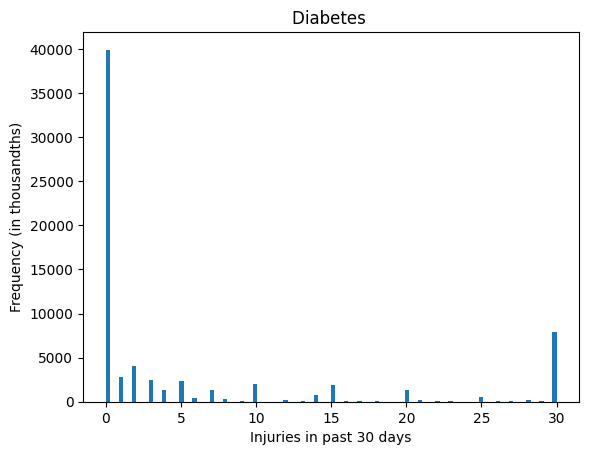

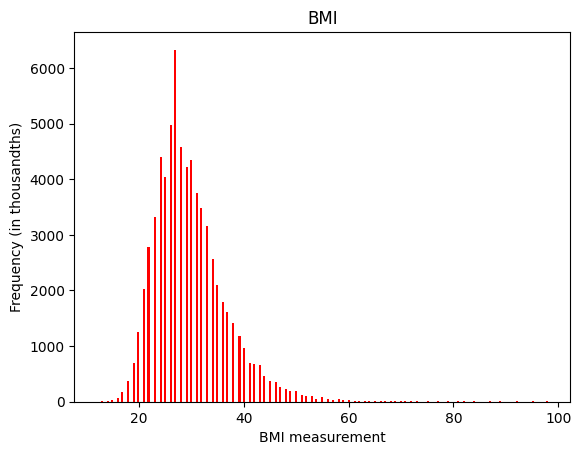

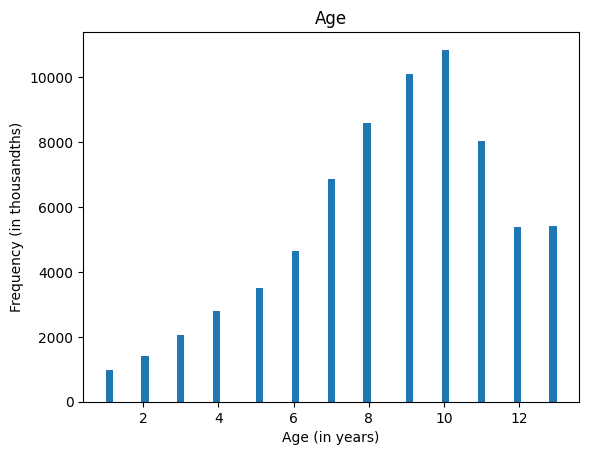

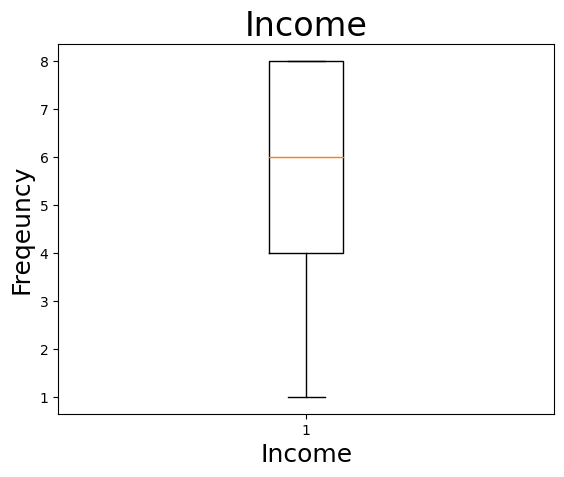

In [ ]:
plt.hist(diabetes["PhysHlth"], bins="auto")
plt.ylabel("Frequency (in thousandths)")
plt.xlabel("Injuries in past 30 days")
plt.title("Diabetes ")
plt.show()

plt.hist(diabetes["BMI"], bins="auto", color="red")
plt.ylabel("Frequency (in thousandths)")
plt.xlabel("BMI measurement")
plt.title("BMI")
plt.show()

plt.hist(diabetes["Age"], bins="auto")
plt.ylabel("Frequency (in thousandths)")
plt.xlabel("Age (in years)")
plt.title("Age")
plt.show()


plt.boxplot(diabetes["Income"])
plt.xlabel("Income", fontsize=18)
plt.ylabel("Freqeuncy", fontsize=18)
#plt.ylabel("Frequency (in thousandths)")
#plt.xlabel("Age (in years)")
plt.title("Income", fontsize=24)
plt.show()

#ML Models

##Setup

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import sklearn

##Logistic Regression

###X and Y declaration


In [ ]:
train_df, test_df = train_test_split(diabetes, test_size = 0.3, random_state = 1)
X = ['BMI', 'PhysHlth', 'HighBP', 'HighChol', 'HvyAlcoholConsump', 'Stroke', 'HeartDiseaseorAttack', 'Smoker', 'CholCheck', 'DiffWalk']
y = 'Diabetes_binary'
X_train = train_df[X]
y_train = train_df[y]
X_test = test_df[X]
y_test = test_df[y]


###Model

In [ ]:
%%time

logreg_model = linear_model.LogisticRegression(max_iter=1000, C=0.01, solver="newton-cholesky")
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)
accuracy = classification_report(y_test, y_pred, target_names=["Healthy", "Diabetes"])
print(accuracy)

              precision    recall  f1-score   support

     Healthy       0.73      0.72      0.72     10681
    Diabetes       0.72      0.73      0.72     10527

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208

CPU times: user 186 ms, sys: 107 ms, total: 292 ms
Wall time: 304 ms


In [ ]:
model = LogisticRegression(max_iter=2000)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of lambda)
    'penalty': ['l1', 'l2']  # L1 or L2 penalty
}
clf=GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
best_params=clf.best_params_
print(best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

{'C': 10, 'penalty': 'l2'}


In [ ]:
best_model = LogisticRegression(max_iter=2000,**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72     10681
         1.0       0.71      0.73      0.72     10527

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208



### Neural Network

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(16,12,8,4,2))
mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)
accuracy = classification_report(y_test, y_pred, target_names=["Healthy", "Diabetes"])
print(accuracy)
param_grid = {
    'hidden_layer_sizes': [((8,6), (16,12), (8,6,3,2), (16,8,6,4,2)), (16,12,8)],
    'alpha': [0.001, 0.01],
    'max_iter': [200, 500, 1000]
}



grid_search = GridSearchCV(mlp_model, param_grid=param_grid, cv=2, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
f1score = classification_report(y_test, y_pred)
print(f1score)

              precision    recall  f1-score   support

     Healthy       0.74      0.69      0.72     10681
    Diabetes       0.71      0.76      0.73     10527

    accuracy                           0.73     21208
   macro avg       0.73      0.73      0.73     21208
weighted avg       0.73      0.73      0.73     21208

              precision    recall  f1-score   support

         0.0       0.75      0.69      0.71     10681
         1.0       0.71      0.76      0.73     10527

    accuracy                           0.72     21208
   macro avg       0.73      0.72      0.72     21208
weighted avg       0.73      0.72      0.72     21208



In [ ]:
print(best_params)
print(best_model)

{'alpha': 0.1, 'hidden_layer_sizes': (8,), 'max_iter': 1000}
MLPClassifier(alpha=0.1, hidden_layer_sizes=(8,), max_iter=1000)


##Ridge Classifier


###X and Y declaration

In [ ]:
train_df, test_df = train_test_split(diabetes, test_size = 0.3, random_state = 1)
X = ['BMI', 'PhysHlth', 'HighBP', 'HighChol', 'HvyAlcoholConsump', 'Stroke', 'HeartDiseaseorAttack', 'Smoker', 'CholCheck']
y = 'Diabetes_binary'
X_train = train_df[X]
y_train = train_df[y]
X_test = test_df[X]
y_test = test_df[y]

###Model

In [ ]:
ridge_model = linear_model.RidgeClassifier()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
accuracy = classification_report(y_test, y_pred, target_names=["Healthy", "Diabetes"])
print(accuracy)
model = linear_model.RidgeClassifier(max_iter=2000)
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Different alpha values to try
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Different solvers
}
clf=GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
best_params=clf.best_params_
print(best_params)
best_model = linear_model.RidgeClassifier(max_iter=2000,**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Healthy       0.73      0.71      0.72     10681
    Diabetes       0.71      0.73      0.72     10527

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208

{'alpha': 0.1, 'solver': 'lsqr'}
              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72     10681
         1.0       0.71      0.73      0.72     10527

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208



##Random Forest Classifier


###X and Y declaration

In [ ]:
train_df, test_df = train_test_split(diabetes, test_size = 0.3, random_state = 1)
X = ['BMI', 'PhysHlth', 'HighBP', 'HighChol', 'HvyAlcoholConsump', 'Stroke', 'HeartDiseaseorAttack', 'Smoker', 'CholCheck']
y = 'Diabetes_binary'
X_train = train_df[X]
y_train = train_df[y]
X_test = test_df[X]
y_test = test_df[y]

###Model

In [ ]:
%%time

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)
accuracy = classification_report(y_test, y_pred, target_names=["Healthy", "Diabetes"])
print(accuracy)
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}
clf=GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
best_params=clf.best_params_
print(best_params)
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Healthy       0.71      0.69      0.70     10681
    Diabetes       0.69      0.72      0.70     10527

    accuracy                           0.70     21208
   macro avg       0.70      0.70      0.70     21208
weighted avg       0.70      0.70      0.70     21208



KeyboardInterrupt: ignored

##Decision Tree Classifier

###X and Y declaration

In [ ]:
train_df, test_df = train_test_split(diabetes, test_size = 0.3, random_state = 1)
X = ['BMI', 'PhysHlth', 'HighBP', 'HighChol', 'HvyAlcoholConsump', 'Stroke', 'HeartDiseaseorAttack', 'Smoker', 'CholCheck']
y = 'Diabetes_binary'
X_train = train_df[X]
y_train = train_df[y]
X_test = test_df[X]
y_test = test_df[y]

###Model

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
accuracy = classification_report(y_test, y_pred, target_names=["Healthy", "Diabetes"])
print(accuracy)
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider
}
clf=GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
best_params=clf.best_params_
print(best_params)
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Healthy       0.69      0.71      0.70     10681
    Diabetes       0.70      0.68      0.69     10527

    accuracy                           0.69     21208
   macro avg       0.69      0.69      0.69     21208
weighted avg       0.69      0.69      0.69     21208



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

KeyboardInterrupt: ignored

##Support Vector Classifier

###X and Y delcaration

In [ ]:
train_df, test_df = train_test_split(diabetes, test_size = 0.3, random_state = 1)
X = ['BMI', 'PhysHlth', 'HighBP', 'HighChol', 'HvyAlcoholConsump', 'Stroke', 'HeartDiseaseorAttack', 'Smoker', 'CholCheck']
y = 'Diabetes_binary'
X_train = train_df[X]
y_train = train_df[y]
X_test = test_df[X]
y_test = test_df[y]

###Model

In [ ]:
# vector_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# vector_model.fit(X_train, y_train)
# Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(gamma='auto'))])
# y_pred = vector_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)

## Advanced Model


In [ ]:
train_df, test_df = train_test_split(diabetes, test_size = 0.3, random_state = 1)
X = ['BMI', 'PhysHlth', 'HighBP', 'HighChol', 'HvyAlcoholConsump', 'Stroke', 'HeartDiseaseorAttack', 'Smoker', 'CholCheck', 'Age', 'Fruits', 'Veggies', 'GenHlth', 'Sex', 'AnyHealthcare', 'NoDocbcCost']
y = 'Diabetes_binary'
X_train = train_df[X]
y_train = train_df[y]
X_test = test_df[X]
y_test = test_df[y]

cnn_model = MLPClassifier()
cnn_model.fit(X_train, y_train)
y_pred = cnn_model.predict(X_test)
accuracy = classification_report(y_test, y_pred, target_names=["Healthy", "Diabetes"])
print(accuracy)
model = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 500, 1000, 2000]
}
clf=GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
best_params=clf.best_params_
print(best_params)
best_model = MLPClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Healthy       0.79      0.70      0.74     10681
    Diabetes       0.72      0.81      0.77     10527

    accuracy                           0.75     21208
   macro avg       0.76      0.75      0.75     21208
weighted avg       0.76      0.75      0.75     21208

{'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 2000}
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75     10681
         1.0       0.76      0.72      0.74     10527

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [ ]:
train_df, test_df = train_test_split(diabetes, test_size = 0.3, random_state = 1)
X = ['BMI', 'PhysHlth', 'HighBP', 'HighChol', 'HvyAlcoholConsump', 'Stroke', 'HeartDiseaseorAttack', 'Smoker', 'CholCheck', 'Age', 'Fruits', 'Veggies', 'GenHlth']
y = 'Diabetes_binary'
X_train = train_df[X]
y_train = train_df[y]
X_test = test_df[X]
y_test = test_df[y]

cnn_model = MLPClassifier()
cnn_model.fit(X_train, y_train)
y_pred = cnn_model.predict(X_test)
accuracy = classification_report(y_test, y_pred, target_names=["Healthy", "Diabetes"])
print(accuracy)

              precision    recall  f1-score   support

     Healthy       0.75      0.75      0.75     10681
    Diabetes       0.75      0.75      0.75     10527

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208

